### 목표
 - 딥러닝 신경망 모델에서 이진분류 설정값 적용해보기
 - 환자 데이터를 이용하여 유방암 판별 모델을 만들어보자
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer_data = load_breast_cancer()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
cancer_data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [9]:
cancer_data.target # target = 답
cancer_data.target_names # 답의 이름 target_names
# 0 - 악성 , 1 - 양성 아래 malignant  = 0 악성 // benign = 1 양성

array(['malignant', 'benign'], dtype='<U9')

### 데이터 분할

In [13]:
X_train, X_test, y_train, y_test = train_test_split( cancer_data.data, # 문제
                                                 cancer_data.target, # 답
                                                 test_size=0.3,
                                                 random_state=3
)

print('훈련용 문제:', X_train.shape)
print('훈련용 답:', y_train.shape)
print('테스트 문제:', X_test.shape)
print('테스트 답:', y_test.shape)

훈련용 문제: (398, 30)
훈련용 답: (398,)
테스트 문제: (171, 30)
테스트 답: (171,)


#### 신경망 모델 만들기
 - 1. 신경망 구조 설계
 - 2. 학습/평가 방법 설정
 - 3. 학습 및 시각화
 - 4. 평가 및 예측

In [14]:
# 중간층 활성화 함수 : sigmoid
# 최적화 함수 : sgd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

In [29]:
# 1. 신경망 구조 설계
model = Sequential()

# 입력층(input_dim) + 중간층(Dense(units))
# input_dim : 특성(입력) 개수 만큼
# activation : 활성화 함수는 Dense 함수 안의 매개변수 값으로 지정
model.add(Dense(units = 50, input_dim = 30, activation='sigmoid'))

# 중간층
model.add(Dense(units = 100, activation = 'sigmoid')) # 층을 쌓음 add(Dense(units=?))
model.add(Dense(units = 50, activation = 'sigmoid'))
model.add(Dense(units = 20, activation = 'sigmoid'))

# 출력층
# 이진분류 !!! 유닛 = 1, activation = 시그모이드
model.add(Dense(units = 1, activation='sigmoid'))

# 모델 정보
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 50)                1550      
                                                                 
 dense_17 (Dense)            (None, 100)               5100      
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 20)                1020      
                                                                 
 dense_20 (Dense)            (None, 1)                 21        
                                                                 
Total params: 12,741
Trainable params: 12,741
Non-trainable params: 0
_________________________________________________________________


In [30]:
#학습이랑 평가방법 설정 : compile
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam', # 최적화 함수 : 확률적 경사하강법
              metrics = ['accuracy']) #평가방법 설정 : 정확도

In [31]:
# 학습
h = model.fit(X_train, y_train, epochs = 100) # epochs 모델 학습 횟수

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.8485 - accuracy: 0.3769
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5327
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6231
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.6231
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6573 - accuracy: 0.6231
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6231
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6475 - accuracy: 0.6231
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6231
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6231
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.6231
Epoch 11/

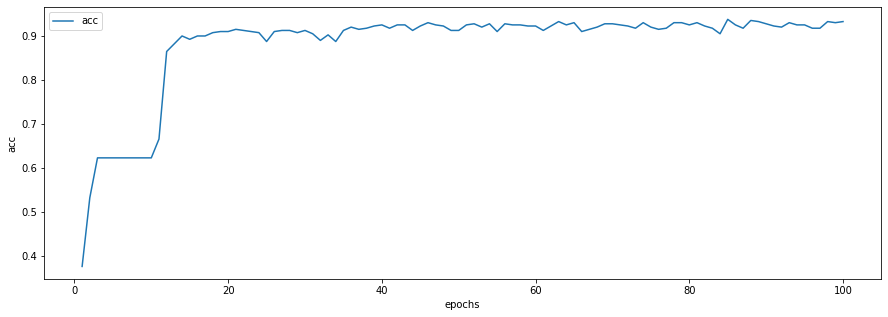

In [32]:
# 시각화 - 학습횟수에 따른 정확도 변화 그래프
plt.figure(figsize = (15,5))
plt.plot(range(1,101),
         h.history['accuracy'],
         label ='acc')
plt.legend()
plt.xlabel('epochs') # epochs = 학습횟수
plt.ylabel('acc')
plt.show()

In [22]:
# 4. 모델 평가
model.evaluate(X_test, y_test)[1]

6/6 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.6374


0.6374269127845764

In [23]:
# 예측
model.predict(X_test)

array([[0.6637473 ],
       [0.61987823],
       [0.6488981 ],
       [0.6673522 ],
       [0.58615166],
       [0.6673689 ],
       [0.62935674],
       [0.6673234 ],
       [0.6639208 ],
       [0.66739035],
       [0.6665677 ],
       [0.66699004],
       [0.66734123],
       [0.6673409 ],
       [0.6673642 ],
       [0.6670853 ],
       [0.66726846],
       [0.6662867 ],
       [0.5657942 ],
       [0.64891636],
       [0.6672329 ],
       [0.656297  ],
       [0.6673919 ],
       [0.6190981 ],
       [0.6600738 ],
       [0.6446723 ],
       [0.66731495],
       [0.5657942 ],
       [0.5657942 ],
       [0.61915886],
       [0.5657946 ],
       [0.666041  ],
       [0.59598243],
       [0.6673875 ],
       [0.6659982 ],
       [0.6524658 ],
       [0.660716  ],
       [0.6078914 ],
       [0.58931255],
       [0.5657942 ],
       [0.5657942 ],
       [0.6671998 ],
       [0.6605599 ],
       [0.5893798 ],
       [0.66101384],
       [0.66731095],
       [0.66115946],
       [0.585